In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches_df = pd.read_csv('data/matches_summarized.csv')
weapons_df = pd.read_csv('data/weapons_summarized.csv')

C:\Users\Litchi\AppData\Local\Temp\ipykernel_11312\379385977.py:2: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  weapons_df = pd.read_csv('data/weapons_summarized.csv')


In [3]:
agent_matches=matches_df.groupby(['agentName'])[['agentName','hasWon']].sum(numeric_only=True)
agent_matches['totalMatches']=matches_df.groupby(['agentName'])[['hasWon']].count()
agent_matches['winRate']=agent_matches['hasWon']/agent_matches['totalMatches']

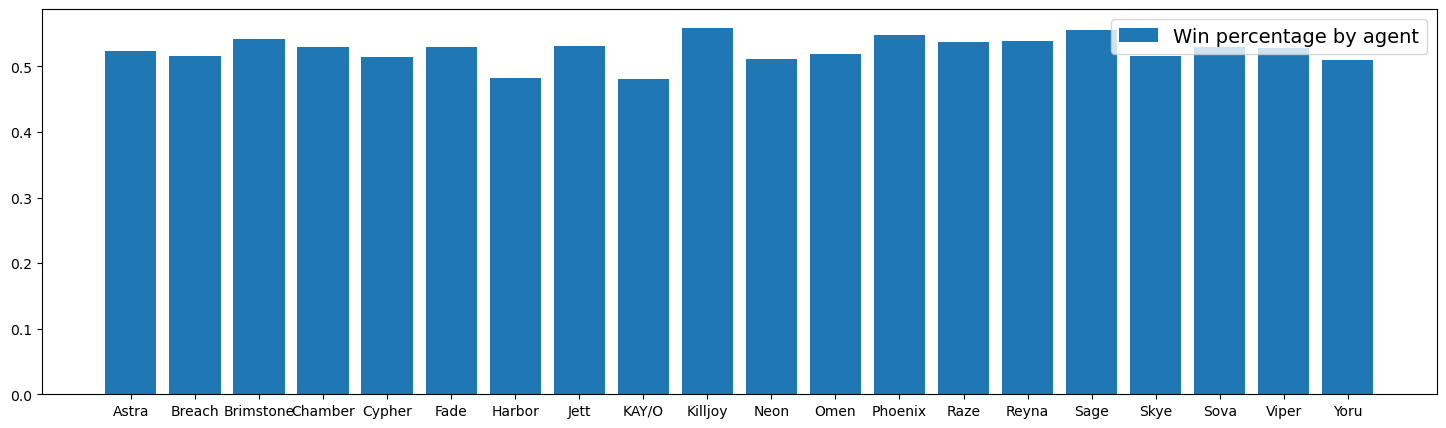

In [4]:
f, ax = plt.subplots(figsize=(18,5)) 
plt.bar(agent_matches.index, agent_matches.winRate.values, label='Win percentage by agent')
ax.legend(fontsize = 14)

In [5]:
agents_stats=matches_df.groupby('agentName')[['playtimeValue']].sum()
agents_stats['playTimeByHour'] = agents_stats['playtimeValue']/3600
agents_by_hour=agents_stats.sort_values('playtimeValue',ascending=False)
top_10_most_played_agents=agents_by_hour.head(10)

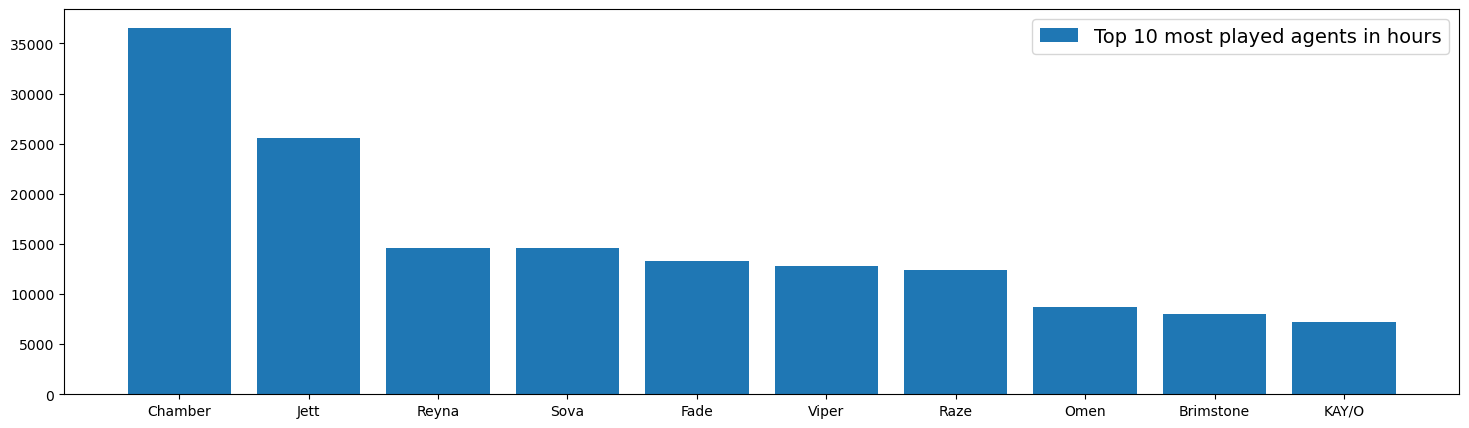

In [18]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(top_10_most_played_agents.index, top_10_most_played_agents.playTimeByHour.values, label='Top 10 most played agents in hours')
ax.legend(fontsize = 14)

In [7]:
most_used_weapons=weapons_df.groupby('weaponName')[['matchesPlayedValue']].sum().sort_values('matchesPlayedValue',ascending=False)

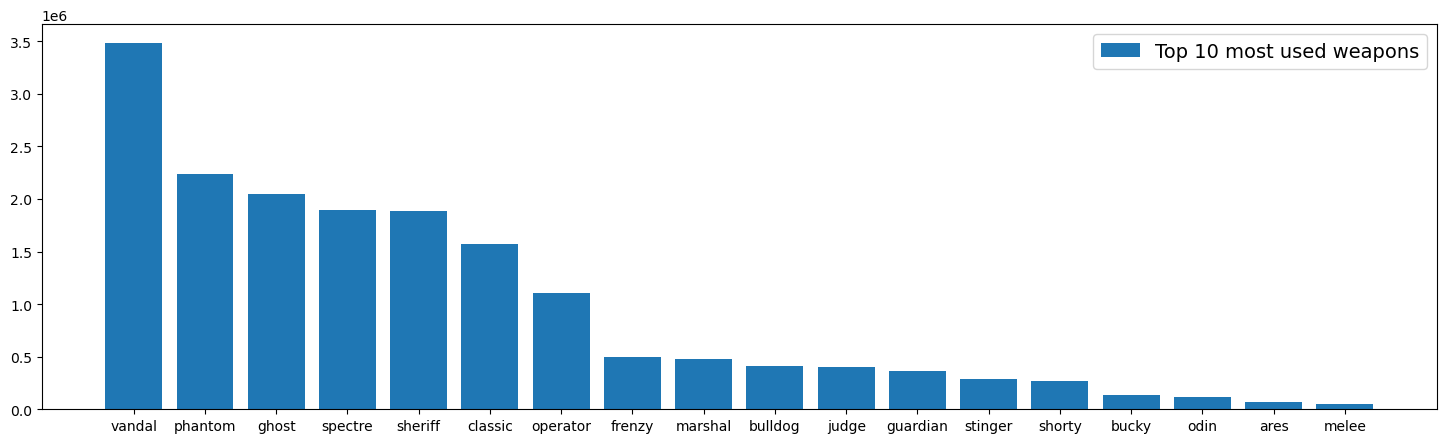

In [17]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(most_used_weapons.index, most_used_weapons.matchesPlayedValue.values, label='Top 10 most used weapons')
ax.legend(fontsize = 14)

In [9]:
weapons_df.groupby('player')[['player','weaponName','headshotsPercentageDisplayValue']].head()

,player,weaponName,headshotsPercentageDisplayValue
0,NIP cauanzin%232233,ares,13.7%
1,NIP cauanzin%232233,marshal,22.0%
2,NIP cauanzin%232233,classic,33.2%
3,NIP cauanzin%232233,operator,5.5%
4,NIP cauanzin%232233,stinger,31.0%
...,...,...,...
33749,machoke%23mepls,stinger,25.6%
33750,machoke%23mepls,shorty,12.0%
33751,machoke%23mepls,judge,15.1%
33752,machoke%23mepls,bulldog,30.3%


In [10]:
players_kd=matches_df.groupby('player')[['kdRatioValue']].sum()/matches_df.groupby('player')[['kdRatioValue']].count()
top_10_players_kd=players_kd.sort_values('kdRatioValue',ascending=False).head(10)

In [11]:
top_10_players_kd

,kdRatioValue
player,
小樱酱%234616,1.873166
elllement%23kgod,1.860597
vision%23fm1,1.834767
pl4zma%231337,1.833065
G2 hoody%23101,1.827041
CaesarGG%230217,1.757776
Dashhou%23Trust,1.727830
vlzkcb%231030,1.712479
FUR mwzera%232323,1.703324


In [12]:
import warnings
warnings.filterwarnings("ignore")

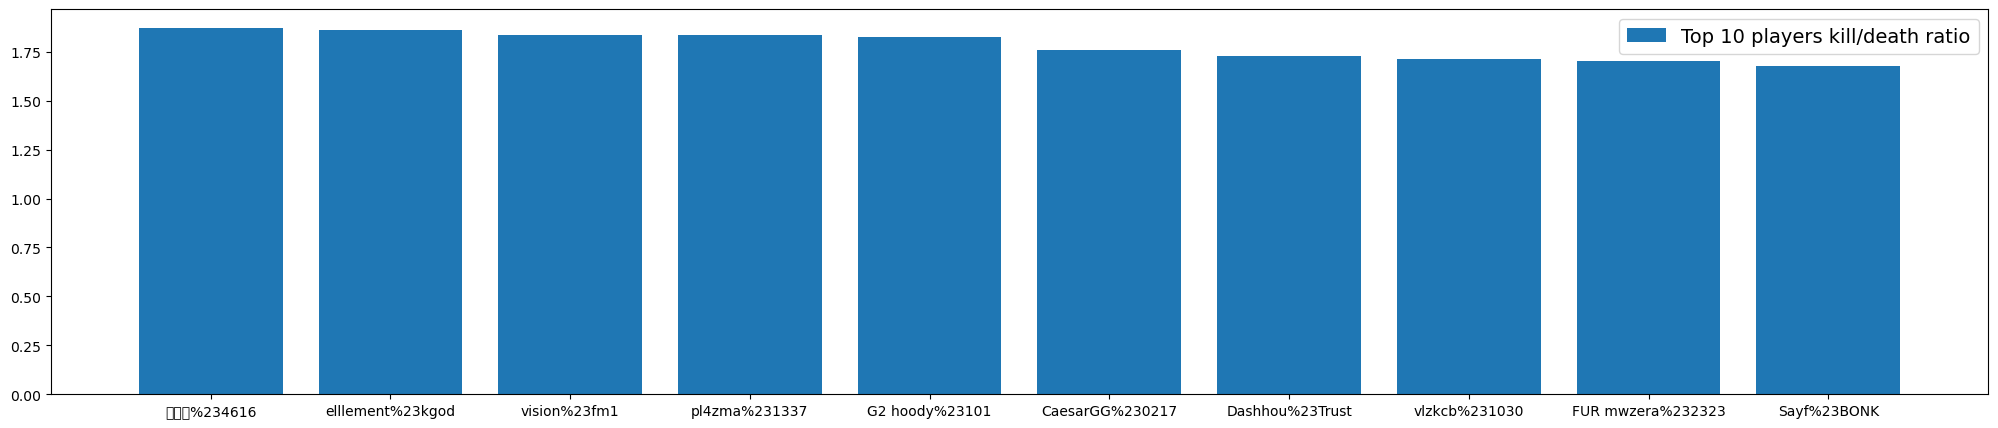

In [13]:
f, ax = plt.subplots(figsize=(25,5)) # set the size that you'd like (width, height)
plt.bar(top_10_players_kd.index, top_10_players_kd.kdRatioValue.values, label='Top 10 players kill/death ratio')
ax.legend(fontsize = 14)

In [14]:
players_hs_percentage=matches_df.groupby('player')[['headshotsPercentageValue']].sum()/matches_df.groupby('player')[['headshotsPercentageValue']].count()
top_10_players_hs_percentage=players_hs_percentage.sort_values('headshotsPercentageValue',ascending=False).head(10)

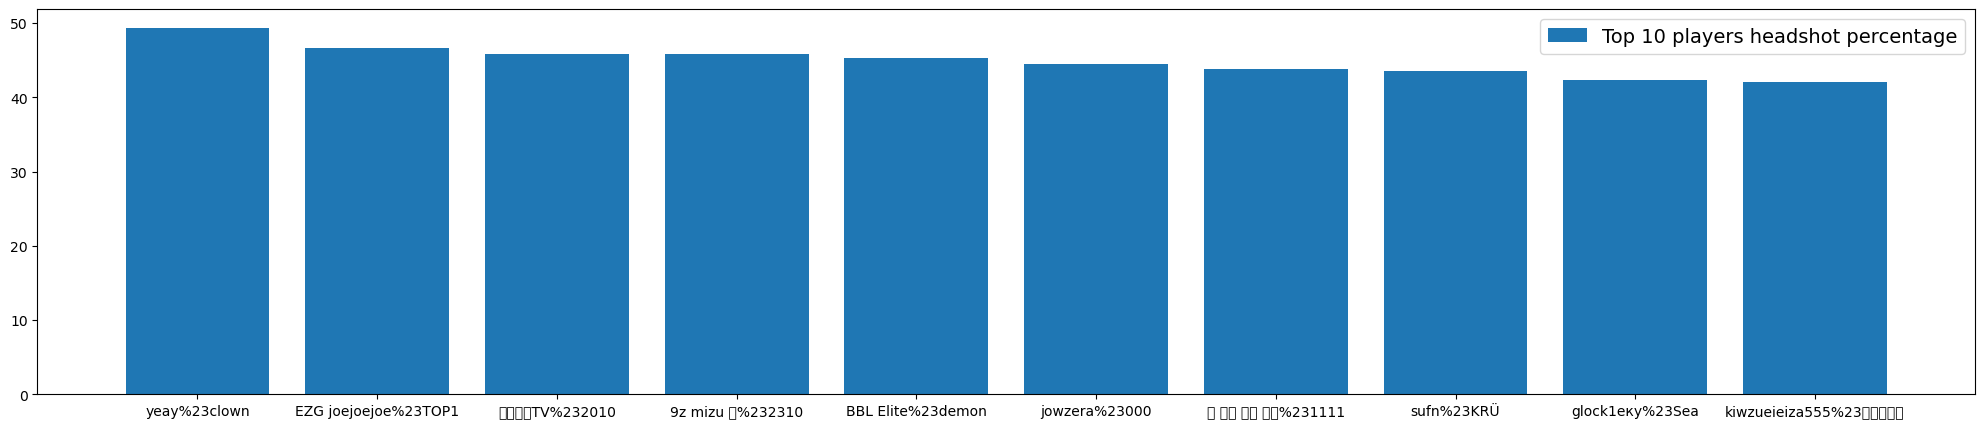

In [15]:
f, ax = plt.subplots(figsize=(25,5)) # set the size that you'd like (width, height)
plt.bar(top_10_players_hs_percentage.index, top_10_players_hs_percentage.headshotsPercentageValue.values, label='Top 10 players headshot percentage')
ax.legend(fontsize = 14)

In [16]:
    
    highest_win_agent = wins_per_agent[wins_per_agent.hasWon == wins_per_agent.hasWon.max()]
    num_matches=df['matchId'].nunique()
    num_playes=df['player'].nunique()
    
def agents_eda(df):
    agents_stats=df.groupby('agentName',as_index=False)[['playtimeValue']].sum()
    agents_stats['playtimeHours']=agents_stats['playtimeValue']/3600
    win_percentage=100.0*df.groupby('agentName')[['hasWon']].sum()/df.groupby('agentName')[['hasWon']].count()
    agents_stats=agents_stats.join(win_percentage,on='agentName')
    kd_ratio=df.groupby('agentName')[['kdRatioValue']].sum()/df.groupby('agentName')[['kdRatioValue']].count()
    agents_stats=agents_stats.join(kd_ratio,on='agentName')
    adr=df.groupby('agentName')[['damagePerRoundValue']].sum()/df.groupby('agentName')[['damagePerRoundValue']].count()
    agents_stats=agents_stats.join(adr,on='agentName')
    acr=df.groupby('agentName')[['scorePerRoundValue']].sum()/df.groupby('agentName')[['scorePerRoundValue']].count()
    agents_stats=agents_stats.join(acr,on='agentName')
    hs_percentage=df.groupby('agentName')[['headshotsPercentageValue']].sum()/df.groupby('agentName')[['headshotsPercentageValue']].count()
    agents_stats=agents_stats.join(hs_percentage,on='agentName')
    kast=df.groupby('agentName')[['kASTValue']].sum()/df.groupby('agentName')[['kASTValue']].count()
    agents_stats=agents_stats.join(kast,on='agentName')
    return agents_stats

def players_eda(df):
    player_stats=df.groupby('player',as_index=False)[['playtimeValue']].sum()
    player_stats['playtimeHours']=player_stats['playtimeValue']/3600
    win_percentage=100.0*df.groupby('player')[['hasWon']].sum()/df.groupby('player')[['hasWon']].count()
    player_stats=player_stats.join(win_percentage,on='player')
    kd_ratio=df.groupby('player')[['kdRatioValue']].sum()/df.groupby('player')[['kdRatioValue']].count()
    player_stats=player_stats.join(kd_ratio,on='player')
    adr=df.groupby('player')[['damagePerRoundValue']].sum()/df.groupby('player')[['damagePerRoundValue']].count()
    player_stats=player_stats.join(adr,on='player')
    acr=df.groupby('player')[['scorePerRoundValue']].sum()/df.groupby('player')[['scorePerRoundValue']].count()
    player_stats=player_stats.join(acr,on='player')
    hs_percentage=df.groupby('player')[['headshotsPercentageValue']].sum()/df.groupby('player')[['headshotsPercentageValue']].count()
    player_stats=player_stats.join(hs_percentage,on='player')
    kast=df.groupby('player')[['kASTValue']].sum()/df.groupby('player')[['kASTValue']].count()
    player_stats=player_stats.join(kast,on='player')
    return player_stats

total_weapons=df['weaponName'].unique()
    kills_per_weapon_per_player=df.groupby('player')[['player','weaponName','killsValue']]
    headshot_percentage_per_weapon_per_player=df.groupby('player')[['player','weaponName','headshotsPercentageDisplayValue']]
    dmg_done_per_weapon_per_player=df.groupby('player')[['player','weaponName','damageValue']]
    avg_kill_per_round_per_player=df.groupby(['player'])[['player','killsPerRoundValue']].mean(numeric_only=True)
    longest_kill_distance_per_weapon_per_player=df.groupby('weaponName')[['player','weaponName','longestKillDistanceValue']]
    
def weapon_usage_percentage(df, weapon_name):
    weapon_used = df.groupby('weaponName')[['matchesPlayedValue']].sum().loc[[weapon_name]]['matchesPlayedValue']
    return 100.0 * weapon_used/df['matchesPlayedValue'].sum()    

IndentationError: expected an indented block (2811122168.py, line 6)